<a href="https://colab.research.google.com/github/ribesstefano/chalmers_dat340_applied_machine_learning/blob/main/assignment_1/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group PA 47 - Author: Stefano Ribes, ribes@chalmers.se

This Notebook can be viewed online at this link: https://colab.research.google.com/drive/1K5IDJ8wIE_jblm-tRKh2e3QpovpEBptB?usp=sharing

# Programming Assignment 1

## Task 0: Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

ASSIGNMENT_ID = 'assignment_1'

data_dir = os.path.join(os.path.abspath(''), 'drive', 'MyDrive')
data_dir = os.path.join(data_dir, 'Colab Notebooks', 'dat340', ASSIGNMENT_ID)
data_dir = os.path.join(data_dir, 'data')
data_dir

'/content/drive/MyDrive/Colab Notebooks/dat340/assignment_1/data'

In [69]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

## Task 1: A classification example: fetal heart condition diagnosis

### Step 1. Reading the data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
filename = os.path.join(data_dir, 'CTG.csv')
data = pd.read_csv(filename, skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


### Step 2. Training the baseline classifier

In [4]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf

DummyClassifier(strategy='most_frequent')

In [5]:
from sklearn.model_selection import cross_val_score

baseline_scores = cross_val_score(clf, Xtrain, Ytrain)
baseline_scores

array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

> The result is a NumPy array that contains the accuracies on the different folds in the cross-validation. Aggregate these scores so that you get a single score that you can use to compare different classifiers.

In order to obtain a single score, I simply average the results of the 5 folds returned from the cross-validation.

In [16]:
from sklearn.metrics import accuracy_score

def aggregate_scores(scores):
    return scores.mean()

baseline_score = aggregate_scores(baseline_scores)
baseline_score

0.7805882352941176

### Step 3. Trying out some different classifiers

First I import the tested classifiers.

In [ ]:
# Tree-based classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Linear classifiers
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# Neural network classifier (will take longer time to train)
from sklearn.neural_network import MLPClassifier

Since I don't have much experience with some of the proposed classifiers, I left most of the parameters at their default value.

In [ ]:
models = {
    'Baseline' : DummyClassifier(strategy='most_frequent'),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=None), # None: till necessary
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=256), # 100
    'GradientBoostingClassifier' : GradientBoostingClassifier(n_estimators=128, max_leaf_nodes=8),
    'LogisticRegression' : LogisticRegression(solver='saga', max_iter=2000, tol=0.1, C=5.5),
    'Perceptron' : Perceptron(early_stopping=True, tol=0.01),
    'LinearSVC' : LinearSVC(dual=False, max_iter=2000, tol=0.0001, C=2.),
    'MLPClassifier' : MLPClassifier(hidden_layer_sizes=(128, 64, 64, ), learning_rate_init=0.01, batch_size=128, max_iter=500),
}

scores = {}

for model_type in models.keys():
    model = models[model_type]
    score = aggregate_scores(cross_val_score(model, Xtrain, Ytrain))
    scores[model_type] = score
    print(f'INFO. Model {model_type} aggregated score: {score:.4f}')

best_model_type = max(scores, key=scores.get)
print('=' * 80)
print(f'INFO. Best Model is {best_model_type} with score: {scores[best_model_type]:.4f}')

INFO. Model Baseline aggregated score: 0.7806
INFO. Model DecisionTreeClassifier aggregated score: 0.9235
INFO. Model RandomForestClassifier aggregated score: 0.9406
INFO. Model GradientBoostingClassifier aggregated score: 0.9506
INFO. Model LogisticRegression aggregated score: 0.8406
INFO. Model Perceptron aggregated score: 0.8294
INFO. Model LinearSVC aggregated score: 0.8971
INFO. Model MLPClassifier aggregated score: 0.8829
INFO. Best Model is GradientBoostingClassifier with score: 0.9506


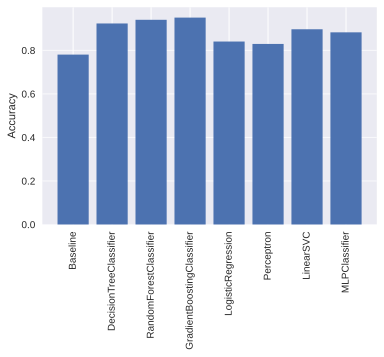

In [ ]:
import matplotlib.pyplot as plt

linspace = [x for x in range(len(models.keys()))]
plt.bar(linspace, scores.values())
plt.xticks(linspace, [f'{m}' for m in models.keys()], rotation=90)
plt.grid(which='both', axis='y', alpha=0.7, zorder=1)
plt.ylabel('Accuracy')
plt.show()

Based on the cross-validation score, the highest score is achieved by the GradientBoostingClassifier model. Because of that, I proceed in training it on the full dataset and then evaluate on the test data.

### Step 4. Final evaluation

In [ ]:
models[best_model_type].fit(Xtrain, Ytrain)
Yguess = models[best_model_type].predict(Xtest)
acc = accuracy_score(Ytest, Yguess)
print(f'INFO. Trained {best_model_type} reached accuracy: {acc:.4f}')

INFO. Trained GradientBoostingClassifier reached accuracy: 0.9272


> **For the report.** In your submitted report, please include a description of the classifier you selected and report its accuracy. (At this point, we are of course not asking you to describe internal workings of various machine learning models that we will cover in detail at later points during the course, but you are of course free to read about them if you're interested.)

#### Gradient Boosting Classifier

The GradientBoostingClassifier is an advanced version of the AdaBoosting model. Like a random forest classifier, it's also ensemble-based, meaning that the classification is done by several "weak" learners, i.e. typically small decision trees.

The main idea, compared to random forests, is not just to create $n$ decision trees and utilize their average score. Rather, each tree is built "from the previous one error". In practice, GradientBoostingClassifier generates $n$ decision trees for which their result minimizes a certain loss function.

In classification task, GradientBoostingClassifier needs to perform a mapping from continuos-values outputs from the weak learners to class probability.

## Task 2: Decision trees for classification

### Setup

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg' 
plt.style.use('seaborn')
%matplotlib inline

# # Load Dataset
# filename = os.path.join(data_dir, 'iris.csv')
# data = pd.read_csv(filename)
# data_shuffled = data.sample(frac=1.0, random_state=0)
# X = data_shuffled.drop('species', axis=1)
# Y = data_shuffled['species']

# data_shuffled.head()

# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.4, random_state=0)
# clf = DecisionTreeClassifier()
# clf.fit(Xtrain, Ytrain);

#### Leaf

In [8]:
class DecisionTreeLeaf:
    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

class DecisionTreeBranch:
    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

#### Decision Tree

In [9]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

#### Tree Classifier

In [10]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [11]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

### Evaluation

> For the report. In your submitted report, please mention what value of max_depth you selected and what accuracy you got.

In [12]:
model = TreeClassifier(max_depth=10, criterion='maj_sum')
model_score = aggregate_scores(cross_val_score(model, Xtrain, Ytrain))
print(model_score)

0.9099999999999999


In [13]:
import itertools

depths = [1, 5, 10, 20]
criterions = ['maj_sum', 'info_gain', 'gini']
best_score = -1
scores = {}

for (d, c) in itertools.product(depths, criterions):
    model = TreeClassifier(max_depth=d, criterion=c)
    model_score = aggregate_scores(cross_val_score(model, Xtrain, Ytrain))
    scores[f'd={d}, c={c}'] = model_score
    print(f'INFO. Tree with depth {d} with criterion {c} achieved: {model_score:.4f}')
    if model_score > best_score:
        best_model = model
        best_depth = d
        best_criterion = c
        best_score = model_score
print(f'INFO. Tree with depth {best_depth} with criterion {best_criterion} achieved best score: {best_score}')

INFO. Tree with depth 1 with criterion maj_sum achieved: 0.8318
INFO. Tree with depth 1 with criterion info_gain achieved: 0.7806
INFO. Tree with depth 1 with criterion gini achieved: 0.8165
INFO. Tree with depth 5 with criterion maj_sum achieved: 0.9124
INFO. Tree with depth 5 with criterion info_gain achieved: 0.9159
INFO. Tree with depth 5 with criterion gini achieved: 0.9300
INFO. Tree with depth 10 with criterion maj_sum achieved: 0.9100
INFO. Tree with depth 10 with criterion info_gain achieved: 0.9294
INFO. Tree with depth 10 with criterion gini achieved: 0.9229
INFO. Tree with depth 20 with criterion maj_sum achieved: 0.9065
INFO. Tree with depth 20 with criterion info_gain achieved: 0.9300
INFO. Tree with depth 20 with criterion gini achieved: 0.9206
INFO. Tree with depth 5 with criterion gini achieved best score: 0.93


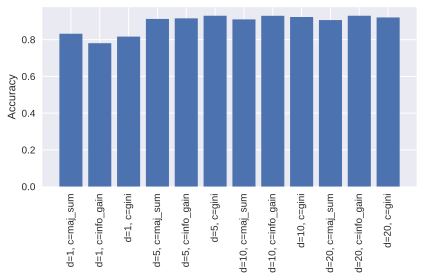

In [14]:
fig, ax = plt.subplots()
linspace = [x for x in range(len(scores.keys()))]
plt.bar(linspace, scores.values())
plt.xticks(linspace, [f'{m}' for m in scores.keys()], rotation=90)
plt.grid(which='both', axis='y', zorder=1)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [17]:
best_model.fit(Xtrain, Ytrain)
acc = accuracy_score(Ytest, best_model.predict(Xtest))
print(f'INFO. Trained TreeClassifier model with max_depth={best_depth} reached test accuracy of: {acc:.4f}')

INFO. Trained TreeClassifier model with max_depth=5 reached test accuracy of: 0.9061


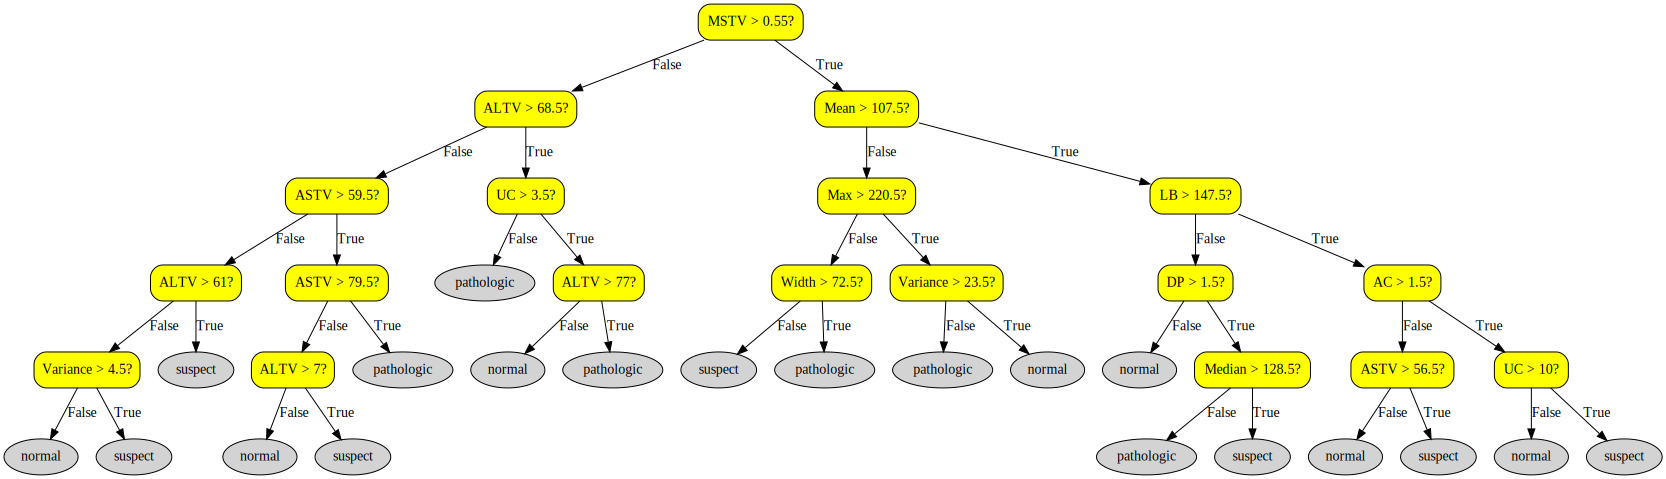

In [ ]:
best_model.draw_tree()

## Task 3: A regression example: predicting apartment prices

### Setup

In [18]:
# Read the CSV file using Pandas.
filename = os.path.join(data_dir, 'sberbank.csv')
alldata = pd.read_csv(filename)

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
Xtrain.head()
# Ytrain.head()

,year,full_sq,life_sq,floor,num_room,kitch_sq,full_all
11042,2013,74,74.0,2.0,2.0,1.0,122862
11309,2013,60,1.0,23.0,2.0,1.0,156377
12432,2013,31,1.0,22.0,1.0,1.0,13890
9674,2013,37,20.0,12.0,1.0,10.0,156377
13000,2013,40,40.0,15.0,1.0,1.0,21155


### Baseline

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [20]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']

array([-0.38697391, -0.39964814, -0.37373174, -0.38247357, -0.31537297])

### Evaluation


Since we are using the negative MSE, we should still search for the model that "maximizes the score".

In [ ]:
models = {
    'Baseline' : DummyRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=None),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=256),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=128, max_leaf_nodes=8),
    'MLPRegressor': MLPRegressor((128, 128, 128,), learning_rate_init=0.1, batch_size=128, max_iter=500),
}

scores = {}

for model_type in models.keys():
    model = models[model_type]
    score = cross_validate(model, Xtrain, Ytrain,
                           scoring='neg_mean_squared_error')['test_score']
    score = aggregate_scores(score)
    scores[model_type] = score
    print(f'INFO. Model {model_type} aggregated score: {score:.4f}')

best_model_type = max(scores, key=scores.get)
print('=' * 80)
print(f'INFO. Best Model is {best_model_type} with score: {scores[best_model_type]:.4f}')

INFO. Model Baseline aggregated score: -0.3716
INFO. Model LinearRegression aggregated score: -0.3432
INFO. Model Ridge aggregated score: -0.3431
INFO. Model Lasso aggregated score: -0.2960
INFO. Model DecisionTreeRegressor aggregated score: -0.6048
INFO. Model RandomForestRegressor aggregated score: -0.3097
INFO. Model GradientBoostingRegressor aggregated score: -0.2808


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


INFO. Model MLPRegressor aggregated score: -23.3665
INFO. Best Model is GradientBoostingRegressor with score: -0.2808


In [ ]:
from sklearn.metrics import mean_squared_error

models[best_model_type].fit(Xtrain, Ytrain)
neg_mse = mean_squared_error(Ytest, models[best_model_type].predict(Xtest))
print(f'INFO. Trained {best_model_type} reached MSE of: {neg_mse:.4f}')

INFO. Trained GradientBoostingRegressor reached MSE of: 0.2969


> For the report. In your submitted report, please include a description of the regression model you selected and report its evaluation score.

A GradientBoostingRegressor model is very similar to a GradientBoostingClassifier model (explained above). It's output doesn't need to be mapped to a probability distribution. Instead, its output is an accumulated continuos sum of the outputs of its weak learners, i.e. decision trees.

## Task 4: Decision trees for regression (Optional)

### Step 1. Implementing the Regression Model

In [59]:
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion # Unused
        
    def fit(self, X, Y):
        # Reference: https://scikit-learn.org/stable/modules/tree.html

        # # 'squared_error', 'friedman_mse', 'absolute_error', 'poisson'}, default='squared_error'
        # def squared_error_scorer(n_low, low_distr, n_high, high_distr):
        #     low_mean = np.mean(low_distr.values())
        #     high_mean = np.mean(high_distr.values())
        #     low_loss = np.sum((low_distr.values() - low_mean)**2) / n_low
        #     high_loss = np.sum((high_distr.values() - high_mean)**2) / n_high
        #     return (n_low * low_loss + n_high * high_loss) / (n_low + n_high)

        # # if self.criterion == 'squared_error':
        # #     self.criterion_function = squared_error_scorer
        # self.criterion_function = squared_error_scorer

        super().fit(X, Y)

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean value.
    def get_default_value(self, Y):
        # ======================================================================
        # TODO: To be changed
        # ======================================================================
        # self.distribution = Counter(Y)
        # return self.distribution.most_common(1)[0][0]
        self.distribution = Y
        return np.mean(self.distribution)

    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        # ======================================================================
        # TODO: To be changed
        # ======================================================================
        # return len(self.distribution) == 1
        variance_threshold = 1.0
        return np.var(self.distribution) < variance_threshold
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):
        # ======================================================================
        # TODO: To be changed
        # ======================================================================
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = np.array(list(X[sorted_indices, feature]))
        Y_sorted = np.array(list(Y[sorted_indices]))

        n = len(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        partial_low_squared_sum = np.sum(Y_sorted[0]**2)
        partial_low_sum_squared = np.sum(Y_sorted[0])

        partial_high_squared_sum = np.sum(Y_sorted[1:]**2)
        partial_high_sum_squared = np.sum(Y_sorted[1:])

        var_tot = np.var(Y_sorted)

        for i in range(0, n-1):
            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]

            partial_low_squared_sum += y_i**2
            partial_low_sum_squared += y_i

            partial_high_squared_sum -= y_i**2
            partial_high_sum_squared -= y_i

            n_low = i + 1
            n_high = n - n_low
            low_var = partial_low_squared_sum / n_low - partial_low_sum_squared**2 / (n_low**2)
            high_var = partial_high_squared_sum / n_high - partial_high_sum_squared**2 / (n_high**2)

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position, i. e. variance reduction
            score = tot_var - (n_high * high_var + n_low * low_var) / n
            print(score)
            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

### Step 2. Sanity Check

> The following function will generate a small number of training examples for a simple regression task with one input variable.

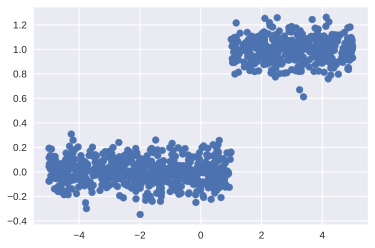

In [60]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1 * np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(1000)
plt.scatter(X, Y)
plt.show()

> For the report. If you consider the data-generating function, what kind of decision tree would we want to describe this data?

In [61]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

Let's do some training and prediction on the generated dataset.

In [62]:
depths = [x for x in range(13)]
criterions = ['squared_error']
best_score = -1
scores = {}

for (d, c) in itertools.product(depths, criterions):
    model = TreeRegressor(max_depth=d, criterion=c)
    model.fit(Xtrain, Ytrain)
    score = cross_validate(model, Xtrain, Ytrain,
                        scoring='neg_mean_squared_error')['test_score']
    score = aggregate_scores(score)
    print(f'INFO. TreeRegressor max_depth={d} reached score: {score:.4f}')

INFO. TreeRegressor max_depth=0 reached score: -0.2473
INFO. TreeRegressor max_depth=1 reached score: -0.2473
INFO. TreeRegressor max_depth=2 reached score: -0.2473
INFO. TreeRegressor max_depth=3 reached score: -0.2473
INFO. TreeRegressor max_depth=4 reached score: -0.2473
INFO. TreeRegressor max_depth=5 reached score: -0.2473
INFO. TreeRegressor max_depth=6 reached score: -0.2473
INFO. TreeRegressor max_depth=7 reached score: -0.2473
INFO. TreeRegressor max_depth=8 reached score: -0.2473
INFO. TreeRegressor max_depth=9 reached score: -0.2473
INFO. TreeRegressor max_depth=10 reached score: -0.2473
INFO. TreeRegressor max_depth=11 reached score: -0.2473
INFO. TreeRegressor max_depth=12 reached score: -0.2473


### Step 3. Predicting apartment prices using decision tree regression

Let's load the dataset again.

In [44]:
# Read the CSV file using Pandas.
filename = os.path.join(data_dir, 'sberbank.csv')
alldata = pd.read_csv(filename)

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
Xtrain.head()
# Ytrain.head()

,year,full_sq,life_sq,floor,num_room,kitch_sq,full_all
11042,2013,74,74.0,2.0,2.0,1.0,122862
11309,2013,60,1.0,23.0,2.0,1.0,156377
12432,2013,31,1.0,22.0,1.0,1.0,13890
9674,2013,37,20.0,12.0,1.0,10.0,156377
13000,2013,40,40.0,15.0,1.0,1.0,21155


Let's do cross-validation on the dataset.

In [45]:
depths = [x for x in range(13)]
criterions = ['maj_sum', 'info_gain', 'gini']
best_score = -1
models = {}
scores = {}

for (d, c) in itertools.product(depths, criterions):
    model = TreeRegressor(max_depth=d, criterion=c)
    score = cross_validate(model, Xtrain, Ytrain,
                           scoring='neg_mean_squared_error')['test_score']
    score = aggregate_scores(score)
    scores[f'd={d}, c={c}'] = score
    models[f'd={d}, c={c}'] = model
    print(f'INFO. Tree with depth {d} with criterion {c} achieved: {score:.4f}')
    if score > best_score:
        best_model = f'd={d}, c={c}'
        best_score = score
print(f'INFO. Tree with {best_model} achieved best score: {scores[best_model]:.4f}')

INFO. Tree with depth 0 with criterion maj_sum achieved: -0.3716
INFO. Tree with depth 0 with criterion info_gain achieved: -0.3716
INFO. Tree with depth 0 with criterion gini achieved: -0.3716
INFO. Tree with depth 1 with criterion maj_sum achieved: -0.3716
INFO. Tree with depth 1 with criterion info_gain achieved: -0.3716
INFO. Tree with depth 1 with criterion gini achieved: -0.3716
INFO. Tree with depth 2 with criterion maj_sum achieved: -0.3716
INFO. Tree with depth 2 with criterion info_gain achieved: -0.3716
INFO. Tree with depth 2 with criterion gini achieved: -0.3716
INFO. Tree with depth 3 with criterion maj_sum achieved: -0.3716
INFO. Tree with depth 3 with criterion info_gain achieved: -0.3716
INFO. Tree with depth 3 with criterion gini achieved: -0.3716
INFO. Tree with depth 4 with criterion maj_sum achieved: -0.3716
INFO. Tree with depth 4 with criterion info_gain achieved: -0.3716
INFO. Tree with depth 4 with criterion gini achieved: -0.3716
INFO. Tree with depth 5 with c

Once the best model is identified, let's train and evaluate it on the dataset.

In [48]:
from sklearn.metrics import mean_squared_error

models[best_model].fit(Xtrain, Ytrain)
neg_mse = mean_squared_error(Ytest, models[best_model].predict(Xtest))
print(f'INFO. Trained TreeRegressor reached MSE of: {neg_mse:.4f}')

INFO. Trained TreeRegressor reached MSE of: 0.4022


> For the report. In your submitted report, please describe what tree depth you used and the evaluation score you got on the test set.

### Step 4. Underfitting and overfitting

In [57]:
eval_scores_train = {}
eval_scores_test = {}

for model_id in models.keys():
    models[model_id].fit(Xtrain, Ytrain)
    neg_mse_train = mean_squared_error(Ytrain, models[model_id].predict(Xtrain))
    neg_mse_test = mean_squared_error(Ytest, models[model_id].predict(Xtest))
    eval_scores_train[model_id] = neg_mse_train
    eval_scores_test[model_id] = neg_mse_test
eval_scores_test.values()

dict_values([0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155, 0.402233142382155])

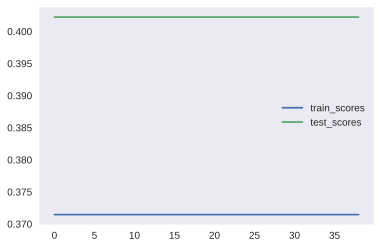

In [58]:
# Plotting
# train_scores = eval_scores_train['gini' in eval_scores_train.keys()]
# test_scores = eval_scores_test['gini' in eval_scores_test.keys()]
plt.plot(list(eval_scores_train.values()), label='train_scores')
plt.plot(list(eval_scores_test.values()), label='test_scores')
plt.legend()
plt.grid()
plt.show()

> For the report. Please include this plot in the report, and comment on the differences between the two curves.

In [71]:
!jupyter nbconvert --to html assignment_1.ipynb

[NbConvertApp] WARNING | pattern 'assignment_1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  

In [70]:
# %%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf

pdf_dir = os.path.join(os.path.abspath(''), 'drive', 'MyDrive')
pdf_dir = os.path.join(pdf_dir, 'Colab Notebooks', 'dat340', ASSIGNMENT_ID)
colab_pdf(os.path.join(pdf_dir, ASSIGNMENT_ID + '.ipynb'))

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks//content/drive/MyDrive/Colab Notebooks/dat340/assignment_1/assignment_1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [

'File Download Unsuccessful. Saved in Google Drive'